# Практическая задача №3 от Александра Неварко
Решение д/у(линейное уравнеие переноса) в частных производных.<br>
`Ut - 2Ux = 0`<br>
В задаче используется разностная схема первого порядка аппроксимации, построенная на шаблоне невяного правого уголка.<br>


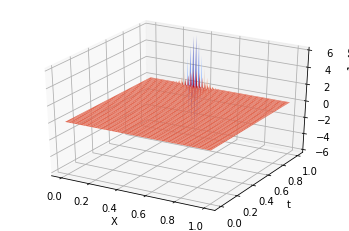

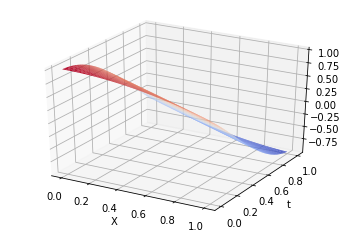

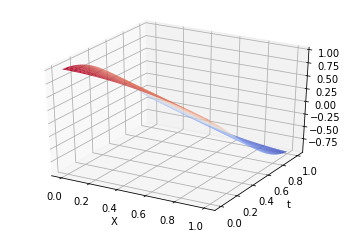

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from math import cos


Tm = 1
Xm = 1


def solution(N, M):
    net = np.zeros((N, M))
    h = Xm / M
    dt = Tm / N
    
    for m in range(M):
        net[0][m] = cos(m*h)
    for n in range(N):
        net[n][M-1] = cos(Tm + 2*n*dt)
        
    for n in range(N-1):
        for m in range(M-1):
            net[n+1][m] = net[n][m] + 2*dt/h * (net[n][m+1] - net[n][m])

    return net


def print3d(net, N, M):
    T = np.linspace(0, Tm, N)
    X = np.linspace(0, Xm, M)
    X, T = np.meshgrid(X, T)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, T, net, cmap=cm.coolwarm,
                       linewidth=1, antialiased=True)
    plt.xlabel('X')
    plt.ylabel('t')
    plt.show()

#N, M = (int(i) for i in input().split())
print3d(solution(100, 100), 100, 100)
print3d(solution(200, 90), 200, 90)
print3d(solution(100, 45), 100, 45)